### Exercício 01 - Subespaço

Considere, em $\mathbb{R}^3$, o plano dado pela equação $x+y-z=0$.
Os vetores $u=[1, 0, 1]^\top$ e $v=[0, 1, 1]^\top$ pertencem a tal plano (como verificar esta afirmação?). Qualquer combinação linear $w=au + bv$, com $a,b\in \mathbb{R}$, pertence ao plano, pois

$$
w = \begin{bmatrix} a \\ b \\ a+b \end{bmatrix}.
$$

Logo o plano corresponde a um subespaço de $\mathbb{R}^3$.
- Implemente uma visualização desse subespaço com os vetores $u$ e $v$ e uma combinação linear qualquer desses vetores.

u pertence ao plano? True
v pertence ao plano? True
Combinação linear w = 1.5u + -0.5v = [ 1.5 -0.5  1. ]
w pertence ao plano? True


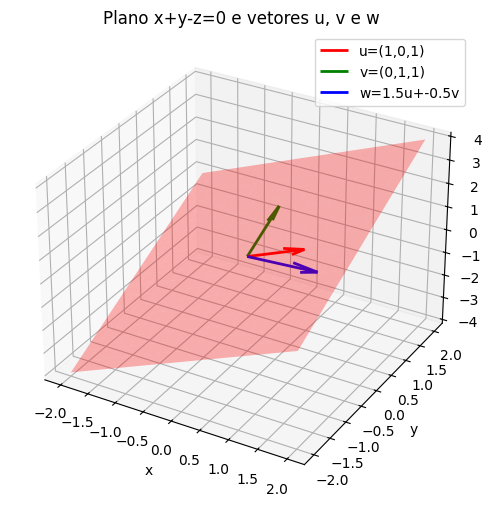

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pertence_plano(vec):
    x, y, z = vec
    return x + y - z == 0

u = np.array([1, 0, 1])
v = np.array([0, 1, 1])

print("u pertence ao plano?", pertence_plano(u))
print("v pertence ao plano?", pertence_plano(v))

a, b = 1.5, -0.5
w = a*u + b*v
print(f"Combinação linear w = {a}u + {b}v = {w}")
print("w pertence ao plano?", pertence_plano(w))

xx, yy = np.meshgrid(np.linspace(-2, 2, 20), np.linspace(-2, 2, 20))
zz = xx + yy

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, zz, alpha=0.3, color='red')

ax.quiver(0, 0, 0, u[0], u[1], u[2], color='r', linewidth=2, label='u=(1,0,1)')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='g', linewidth=2, label='v=(0,1,1)')
ax.quiver(0, 0, 0, w[0], w[1], w[2], color='b', linewidth=2, label=f'w={a}u+{b}v')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Plano x+y-z=0 e vetores u, v e w")
ax.legend()

plt.show()


### Exercício 02 - Mudança de base
Considere a base $B$ de $\mathbb{R}^3$ formada pelos vetores $(1,0,1)$, $(1,1,1)$ e $(1,1,2)$. Considere também a base $C$ formada pelos vetores $(1,0,0)$, $(0,1,0)$ e $(0,0,1)$.
- Calcule $M_B^C$ e $M_C^B$
- Generalize o cálculo da matriz de mudança de base em uma função.
- Sejam as coordenadas do vetor $v$ em relação a base $C$ dadas por $v_C = [8, 7, 1]^\top$. Calcule as coordenadas do vetor $v$ em relação a base $B$.

In [ ]:
import numpy as np

baseB = np.array([[1, 0, 0, 1],
                  [1, 0, 0, -1],
                  [1, 1, 1, 0],
                  [0, 1, 1, 1]])

baseC = np.array([[1, 1, 0, 1],
                  [1, 1, 1, 0],z
                  [1, 0, 0, 0],
                  [0, 1, 1, 1]])


M_B_C = baseB.T
print("Matriz M_B^C:")
print(M_B_C)
print()

M_C_B = np.linalg.inv(M_B_C)
print("Matriz M_C^B:")
print(M_C_B)
print()

def matriz_mudanca_base(base_origem, base_destino):
    """
    Calcula a matriz de mudança de base da base_origem para base_destino
    """
    M_origem = np.array(base_origem).T
    M_destino = np.array(base_destino).T
    
    # M_origem^destino = M_destino^(-1) @ M_origem
    return np.linalg.inv(M_destino) @ M_origem

print("Matriz M_B^C:")
print(matriz_mudanca_base(baseB, baseC))
print()

print("Matriz M_C^B:")
print(matriz_mudanca_base(baseC, baseB))
print()

v_C = np.array([8, 7, 1])

v_B = M_C_B @ v_C
print(f"Coordenadas de v na base C: {v_C}")
print(f"Coordenadas de v na base B: {v_B}")
print()

v_C_verificacao = M_B_C @ v_B
print(f"Verificação - voltando para base C: {v_C_verificacao}")
print(f"Funcionou? {v_C == v_C_verificacao}")

Matriz M_B^C:
[[ 1  1  1  0]
 [ 0  0  1  1]
 [ 0  0  1  1]
 [ 1 -1  0  1]]



LinAlgError: Singular matrix